In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#code for title font dictionary
title_fonts={'fontsize':'30', 'fontfamily':'Franklin Gothic Book'}
#code for label font dictionary
label_fonts={'weight': 'bold', 'fontsize':'30','fontfamily':'Franklin Gothic Book'}
#code for color paletter used on plots
sns.color_palette('crest')

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

In [2]:
#Reading the NERSARC csv file.
data=pd.read_csv(r'C:\Users\bboul\Downloads\nesarc_pds.csv', low_memory=False)
#Checking for duplicates
print('Duplicates: '+ str(data.duplicated().sum()))

Duplicates: 0


In [3]:
#Creating list of used columns for easier use in functions
columns=['SEX','S1Q11B','S1Q10B','S3BQ1A1','S3BQ1A2','S3BQ1A3','S3BQ1A4',
         'S3BQ1A5','S3BQ1A6','S3BQ1A7','S3BQ1A8','S3BQ1A9A','S3BQ1A10A','DGSTATUS',
         'S1Q1D1', 'S1Q1D2', 'S1Q1D3', 'S1Q1D4', 'S1Q1D5', 'S1Q1C']

#Selcing only Columns needed and renaming to df(dataframe)
df=data.loc[:, (columns)]

#Coverting data to proper data type
df[columns]=df[columns].apply(lambda x: x.astype('category'))

#Renaming columns to make them easier to read in table
df.rename(columns={'SEX':'Sex','S1Q11B':'Household Income','S1Q10B':'Personal Income',
                   'S3BQ1A1':'Sedatives','S3BQ1A2':'Tranquilizers','S3BQ1A3':'Opioids',
                   'S3BQ1A4':'Amphetamines','S3BQ1A5':'Cannabis','S3BQ1A6':'Cocaine',
                   'S3BQ1A7':'Hallucinogens','S3BQ1A8':'Inhalants','S3BQ1A9A':'Heroin',
                   'S3BQ1A10A':'Other Drugs','DGSTATUS':'Drug Status',
                   'S1Q1D1':'American Indian or Alaska Native','S1Q1D2':'Asian',
                   'S1Q1D3':'Black or African American', 'S1Q1D4':'Native Hawaiian or Pacific Islander',
                   'S1Q1D5':'White', 'S1Q1C': 'Hispanic'}, inplace=True)

In [4]:
#Creating drug variable for easier use in functions
drugs = ['Sedatives','Tranquilizers','Opioids','Amphetamines','Cannabis',
         'Cocaine','Hallucinogens','Inhalants','Heroin','Other Drugs']

#creating value counts for drugs used
drug_use_counts = df.loc[:, (drugs)].apply(pd.Series.value_counts, axis=1).fillna(0)
#taking only the values of 1 which indicated Yes, if they have ever tried that drug.
df['Drugs Used']=drug_use_counts[1].astype(int)
#Now that we have amount of drugs used, drop the individual drugs since they aren't really critical
df.drop(columns=drugs, inplace=True)

#Creating a Race column from 'S1Q1c','S1Q1D1','S1Q1D2','S1Q1D3','S1Q1D4','S1Q1D5' then dropping unneeded
df['Race']=""
for race in df.columns[4:10]:
    df.loc[df[race] == 1, 'Race'] = race
df.drop(columns=df.columns[4:10], inplace=True)
df['Race']=df['Race'].astype('category')

#Loop to describe all the categorical rows
for i in df.columns:
    print(df[i].describe(),'\n')

count     43093
unique        2
top           2
freq      24575
Name: Sex, dtype: int64 

count     43093
unique       21
top          11
freq       4301
Name: Household Income, dtype: int64 

count     43093
unique       18
top           6
freq       3940
Name: Personal Income, dtype: int64 

count     43093
unique        3
top           3
freq      33953
Name: Drug Status, dtype: int64 

count    43093.000000
mean         0.469960
std          1.228872
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: Drugs Used, dtype: float64 

count     43093
unique        6
top       White
freq      25133
Name: Race, dtype: object 



In [5]:
#View first few rows of data
df.head()

,Sex,Household Income,Personal Income,Drug Status,Drugs Used,Race
0,1,11,6,3,0,Hispanic
1,2,10,4,3,0,Hispanic
2,2,2,2,3,0,Hispanic
3,1,11,8,3,0,Hispanic
4,1,15,11,3,0,Black or African American


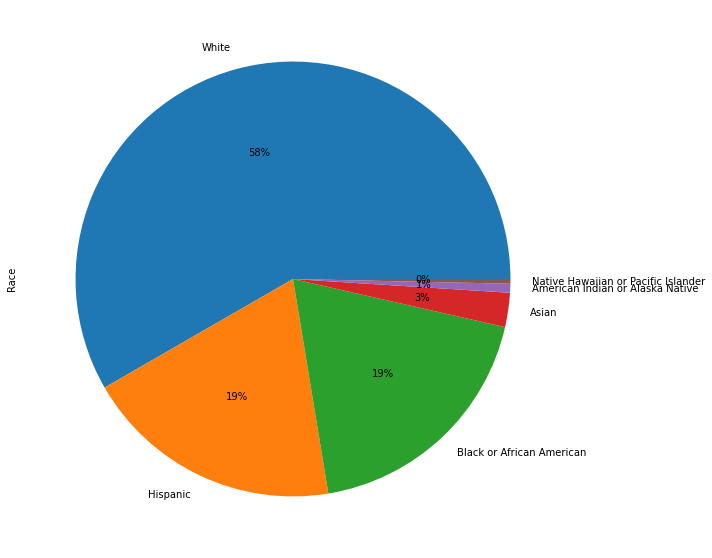

In [6]:
# Showing the distrubtion of Race for population
df['Race'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.0f%%', startangle=0)
sns.set_context('paper')
plt.show()

In [7]:
#Checking for NaN values and duplicates
df.isnull().sum(), df.info(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43093 entries, 0 to 43092
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Sex               43093 non-null  category
 1   Household Income  43093 non-null  category
 2   Personal Income   43093 non-null  category
 3   Drug Status       43093 non-null  category
 4   Drugs Used        43093 non-null  int32   
 5   Race              43093 non-null  category
dtypes: category(5), int32(1)
memory usage: 380.7 KB


(Sex                 0
 Household Income    0
 Personal Income     0
 Drug Status         0
 Drugs Used          0
 Race                0
 dtype: int64,
 None,
 37783)

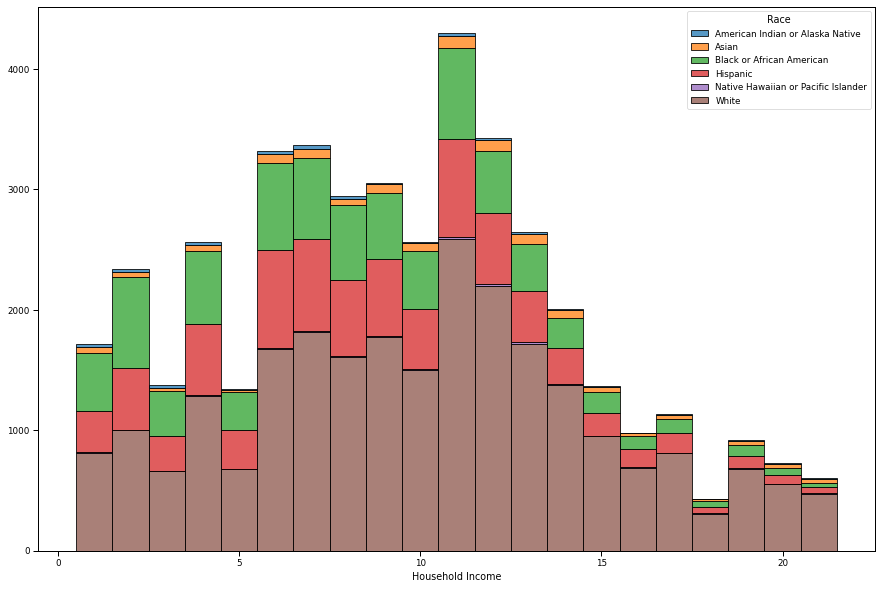

In [8]:
#Distrubtion for income separated by race
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.histplot(x=df['Household Income'], hue=df['Race'], multiple='stack', palette='tab10')
ax.set_ylabel(None)
sns.set_context('talk')
plt.show()

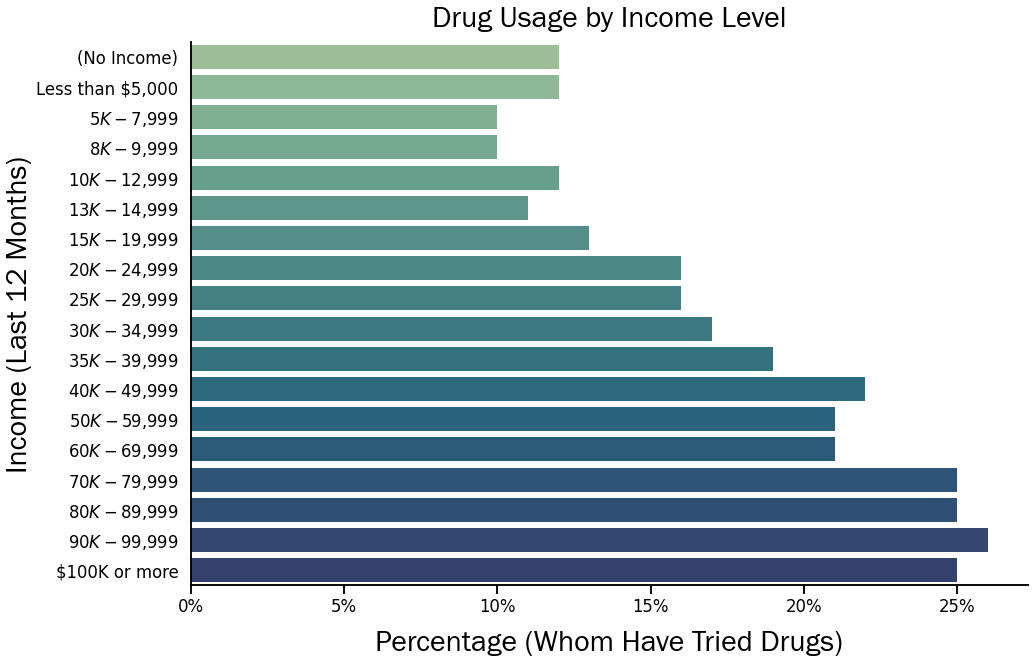

Personal Income
0     0.12
1     0.12
2     0.10
3     0.10
4     0.12
5     0.11
6     0.13
7     0.16
8     0.16
9     0.17
10    0.19
11    0.22
12    0.21
13    0.21
14    0.25
15    0.25
16    0.26
17    0.25
Name: Drug Status, dtype: float64


In [9]:
#Creating labels for the x-axis for plot
personal_income =['(No Income)','Less than $5,000','$5K-$7,999','$8K-$9,999',
                  '$10K-$12,999','$13K-$14,999','$15K-$19,999','$20K-$24,999','$25K-$29,999',
                  '$30K-$34,999','$35K-$39,999','$40K-$49,999','$50K-$59,999','$60K-$69,999',
                  '$70K-$79,999','$80K-$89,999','$90K-$99,999','$100K or more']

#Grouping data by those who have tried drugs
#The data is designated by 1 for those who are no longer users, 2 for current users
#Taking those numbers as those who have tried_drugs 
used_drugs=df.groupby('Personal Income')['Drug Status'].value_counts(normalize=True)[:,1 and 2].round(2)

#Code for figure and plot
fig, ax, = plt.subplots(figsize=(15,10))
ax=sns.barplot(data=df, y=used_drugs.index, x=used_drugs, palette=sns.color_palette('crest',18))

#Correcting format for y axis percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
#Setting title
ax.set_title('Drug Usage by Income Level', fontdict=title_fonts, pad=15)
#Setting x label
ax.set_xlabel('Percentage (Whom Have Tried Drugs)', fontdict=label_fonts, labelpad=15)
#Setting tick labels for x-axis
ax.set_yticklabels(personal_income)
#Setting y label
ax.set_ylabel('Income (Last 12 Months)', fontdict=label_fonts)

#Removing left ticks 
ax.tick_params(left=False)
#Removing top and right border on plot
sns.despine(top=True, right=True)
plt.show()

#printing values for groupby data
print(used_drugs)

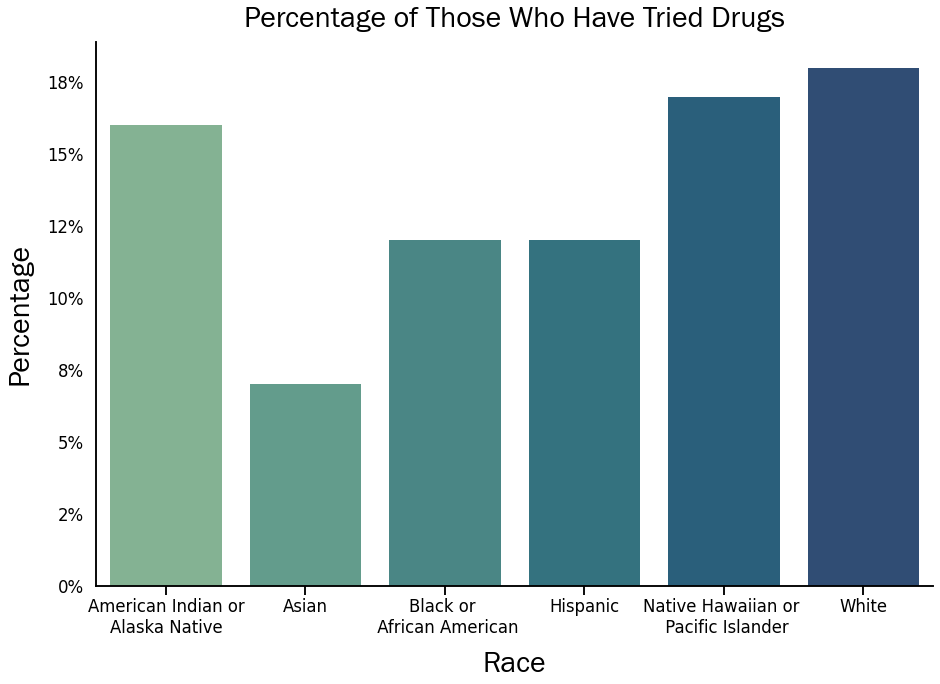

In [10]:
labels=['American Indian or\nAlaska Native','Asian',
        'Black or \n African American','Hispanic','Native Hawaiian or \n Pacific Islander',
        'White']

tried_drugs= df.groupby('Race')['Drug Status'].value_counts(normalize=True)[:,1 and 2].round(2)

fig, ax, = plt.subplots(figsize=(15,10))
ax=sns.barplot(data=df, x=tried_drugs.index, y=tried_drugs, palette=sns.color_palette('crest',6), ax=ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.set_xticklabels(labels)
ax.set_ylabel('Percentage', fontdict=label_fonts, labelpad=15)
ax.set_xlabel('Race', fontdict=label_fonts, labelpad=15)
ax.set_title('Percentage of Those Who Have Tried Drugs', fontdict=title_fonts, pad=15)
ax.tick_params(left=False)
sns.despine(top=True, right=True)
plt.show()

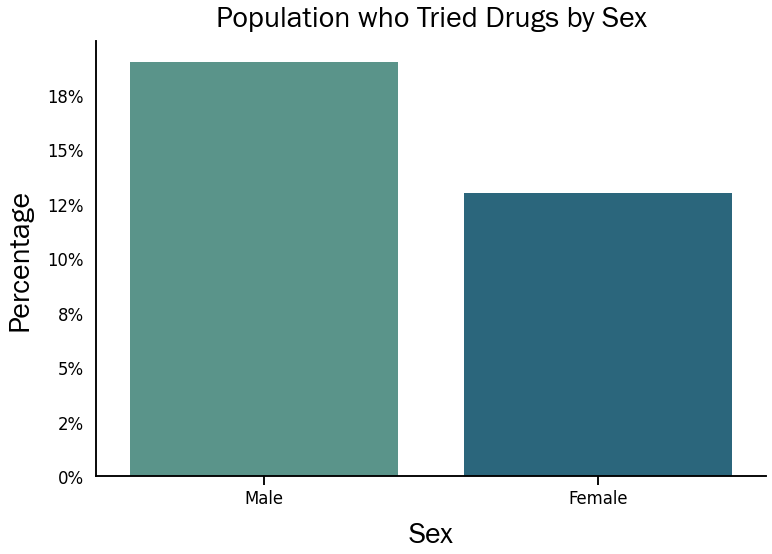

In [11]:
sex_plot_labels= ['Male','Female']
fig, ax, = plt.subplots(figsize=(12,8))
tried_drugs=df.groupby('Sex')['Drug Status'].value_counts(normalize=True)[:,1 and 2].round(2)

ax=sns.barplot(data=df, x=tried_drugs.index, y=tried_drugs, ax=ax, palette=sns.color_palette('crest',2))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.set_xticklabels(sex_plot_labels)
ax.set_ylabel('Percentage', fontdict=label_fonts, labelpad=15)
ax.set_xlabel('Sex', fontdict=label_fonts, labelpad=15)
ax.set_title('Population who Tried Drugs by Sex', fontdict=title_fonts, pad=15)
ax.tick_params(left=False)
sns.despine(top=True, right=True)
plt.show()